In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\gouth\OneDrive\Desktop\Big Mart"

C:\Users\gouth\OneDrive\Desktop\Big Mart


In [3]:
bigmarttrain=pd.read_csv("train_v9rqX0R.csv")

In [4]:
bigmarttest=pd.read_csv("test_AbJTz2l.csv")

In [5]:
print(bigmarttrain.shape)
print(bigmarttest.shape)

(8523, 12)
(5681, 11)


In [6]:
bigmarttrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
bigmarttest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
# For data pre processing both must be concated
# Whatever preprocessing done on Train same must be done on the test
# Hence Concatination must be done
# But for Concatination the number of variables and sequence of variables must be same

In [9]:
bigmarttest["Item_Outlet_Sales"]="test"

In [10]:
# Combine both train and test for pre processing
combinedf=pd.concat([bigmarttrain,bigmarttest],axis=0)

# axis=0 refers to row wise concatination

In [11]:
combinedf.shape

(14204, 12)

In [12]:
combinedf.isnull().sum().sort_values(ascending=False)

Outlet_Size                  4016
Item_Weight                  2439
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
(combinedf.isnull().sum().sort_values(ascending=False))/combinedf.shape[0]

Outlet_Size                  0.282737
Item_Weight                  0.171712
Item_Identifier              0.000000
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [14]:
combinedf.Outlet_Size.value_counts(dropna=False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [15]:
# Since there are many NAs and cannot replace with existing Categories
# input with word 'Not Available'
combinedf.Outlet_Size=combinedf.Outlet_Size.fillna("NotAvailable")

In [16]:
combinedf.Item_Weight.describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [17]:
# Mean Inputation
combinedf.Item_Weight=combinedf.Item_Weight.fillna(combinedf.Item_Weight.mean())

<AxesSubplot:>

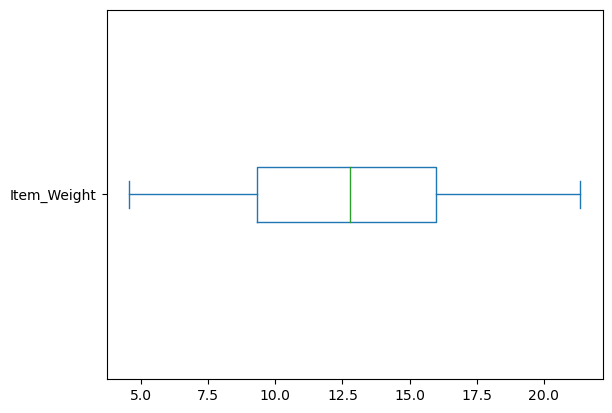

In [18]:
combinedf.Item_Weight.plot(kind='box',vert=False)

In [19]:
combinedf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [20]:
combinedf.Item_Identifier.head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [21]:
# we willl extract item_code from identifier
combinedf['Item_Code']=combinedf.Item_Identifier.apply(lambda x:x[0:2])

In [22]:
combinedf.Item_Code.value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Code, dtype: int64

In [23]:
combinedf.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [24]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace(["LF","low fat","Low fat"])

In [25]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace("reg","Regular")

In [26]:
combinedf.Item_Visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [27]:
combinedf.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [28]:
combinedf.Item_MRP.describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

In [29]:
combinedf.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [30]:
# Create new variable called "Outlet_Age" as of 2022 based on Outlet_Establishment_Year
combinedf["Outlet_Age"]=2022-combinedf.Outlet_Establishment_Year

In [31]:
combinedf.Outlet_Age.describe()

count    14204.000000
mean        24.169319
std          8.371664
min         13.000000
25%         18.000000
50%         23.000000
75%         35.000000
max         37.000000
Name: Outlet_Age, dtype: float64

In [32]:
combinedf.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [33]:
combinedf.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [34]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  object 
 12  Item_Code                  14204 non-null  object 
 13  Outlet_Age                 14204 non-null  int6

In [35]:
combinedf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Code', 'Outlet_Age'],
      dtype='object')

In [36]:
# split the data into numeric and object 
numericcols=combinedf[["Item_Weight","Item_Visibility","Item_MRP","Outlet_Age","Item_Outlet_Sales",
                       "Outlet_Establishment_Year"]]

In [37]:
objectcols=combinedf[["Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type",
                      "Outlet_Type","Item_Code",]]

In [38]:
objectcols.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,FD
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,DR
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,FD
3,Regular,Fruits and Vegetables,OUT010,NotAvailable,Tier 3,Grocery Store,FD
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,NC


In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le=LabelEncoder()

In [41]:
objectcols_labelEncode=objectcols.apply(le.fit_transform)

In [42]:
objectcols.head(3)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,FD
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,DR
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,FD


In [43]:
objectcols_labelEncode.head(3)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code
0,0,4,9,1,0,1,1
1,1,14,3,1,2,2,0
2,0,10,9,1,0,1,1


In [44]:
objectcols_dummy=pd.get_dummies(objectcols)

In [45]:
objectcols_dummy.head(3)

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Code_DR,Item_Code_FD,Item_Code_NC
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [46]:
print(objectcols.shape)
print(objectcols_labelEncode.shape)
print(objectcols.shape)

(14204, 7)
(14204, 7)
(14204, 7)


In [47]:
numericcols.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Outlet_Sales,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,23,3735.138,1999
1,5.92,0.019278,48.2692,13,443.4228,2009
2,17.50,0.016760,141.6180,23,2097.27,1999
3,19.20,0.000000,182.0950,24,732.38,1998
4,8.93,0.000000,53.8614,35,994.7052,1987


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler=StandardScaler()

In [50]:
numeric_scaled=scaler.fit_transform(numericcols.iloc[:,0:4])

In [51]:
pd.DataFrame(numeric_scaled,columns=['Item_Weight',"Item_Visibility","Item_MRP","Outlet_Age"]).head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.824939,-0.969852,1.752511,-0.139681
1,-1.623224,-0.907063,-1.493696,-1.334228
2,1.111729,-0.956000,0.009874,-0.139681
3,1.513233,-1.281712,0.661838,-0.020226
4,-0.912325,-1.281712,-1.403623,1.293777


In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
normalize=MinMaxScaler()

In [54]:
numeric_normalize=normalize.fit_transform(numericcols.iloc[:,0:4])

In [55]:
pd.DataFrame(numeric_normalize,columns=['Item_Weight',"Item_Visibility","Item_MRP","Outlet_Age"]).head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,0.282525,0.048866,0.927507,0.416667
1,0.081274,0.058705,0.072068,0.000000
2,0.770765,0.051037,0.468288,0.416667
3,0.871986,0.000000,0.640093,0.458333
4,0.260494,0.000000,0.095805,0.916667


In [56]:
from sklearn.preprocessing import RobustScaler

In [57]:
robust=RobustScaler()

In [58]:
numeric_robust=robust.fit_transform(numericcols.iloc[:,0:4])

In [59]:
pd.DataFrame(numeric_robust,columns=['Item_Weight',"Item_Visibility","Item_MRP","Outlet_Age"]).head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.521322,-0.566751,1.171145,0.000000
1,-1.025799,-0.518530,-1.023237,-0.588235
2,0.702559,-0.556113,-0.006849,0.000000
3,0.956290,-0.806258,0.433868,0.058824
4,-0.576545,-0.806258,-0.962349,0.705882


In [60]:
numeric_scaled=pd.DataFrame(numeric_scaled,columns=['Item_Weight',"Item_Visibility",
                                                    "Item_MRP","Outlet_Age"]).reset_index(drop=True)

In [61]:
objectcols_labelEncode=objectcols_labelEncode.reset_index(drop=True)

In [62]:
combinedf_clean=pd.concat([numeric_scaled,objectcols_labelEncode],axis=1)

In [63]:
numericcols=numericcols.reset_index(drop=True)

In [64]:
# Add Dependent Variable
combinedf_clean['Item_Outlet_Sales']=numericcols.Item_Outlet_Sales

In [65]:
combinedf_clean.tail()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code,Item_Outlet_Sales
14199,-0.541524,-1.019425,0.005000,0.099229,1,13,8,3,0,1,1,test
14200,-1.226443,1.497142,0.453249,-1.334228,1,15,3,1,2,2,1,test
14201,-0.659613,0.147226,-0.358558,-0.498045,0,8,7,2,1,1,2,test
14202,0.592135,-1.281712,1.185747,-1.095319,1,3,2,2,1,1,1,test
14203,-0.777703,0.753397,-0.985894,-0.498045,1,3,7,2,1,1,1,test


In [66]:
# Split Data back to Train and Test

bigmarttrain_df=combinedf_clean[combinedf_clean.Item_Outlet_Sales!="test"]
bigmarttest_df=combinedf_clean[combinedf_clean.Item_Outlet_Sales=="test"]

In [67]:
bigmarttest_df=bigmarttest_df.drop("Item_Outlet_Sales",axis=1)

In [68]:
bigmarttest_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code
8523,1.879311e+00,-1.134699,-0.533831,-0.139681,0,13,9,1,0,1,1
8524,-1.061118e+00,-0.534917,-0.864708,-1.095319,1,4,2,2,1,1,1
8525,4.268098e-01,0.653405,1.622763,-0.020226,0,11,0,2,2,0,2
8526,-1.293754e+00,-0.982657,0.225966,-1.095319,0,13,2,2,1,1,1
8527,1.388671e-13,1.023121,1.501577,1.532686,1,4,5,1,2,3,1


In [69]:
bigmarttrain_df.Item_Outlet_Sales.dtype

dtype('O')

In [70]:
bigmarttrain_df.Item_Outlet_Sales=bigmarttrain_df.Item_Outlet_Sales.astype("float64")

C:\Users\gouth\AppData\Local\Temp\ipykernel_23756\3272639241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigmarttrain_df.Item_Outlet_Sales=bigmarttrain_df.Item_Outlet_Sales.astype("float64")


In [71]:
y=bigmarttrain_df.Item_Outlet_Sales # dependent variable
x= bigmarttrain_df.drop("Item_Outlet_Sales",axis=1)

<AxesSubplot:ylabel='Frequency'>

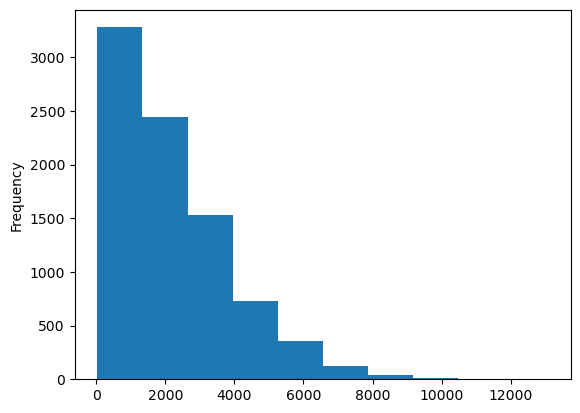

In [72]:
y.plot(kind="hist")

<AxesSubplot:>

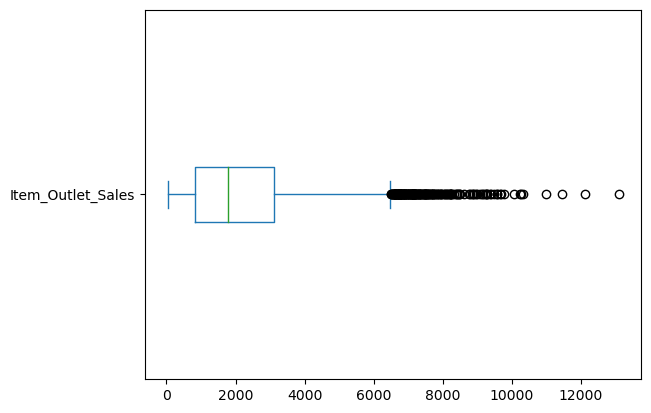

In [73]:
y.plot(kind="box",vert=False)

<AxesSubplot:ylabel='Density'>

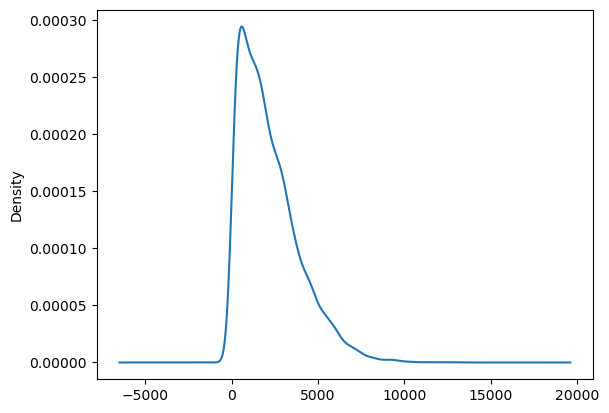

In [74]:
y.plot(kind="density")

<AxesSubplot:ylabel='Density'>

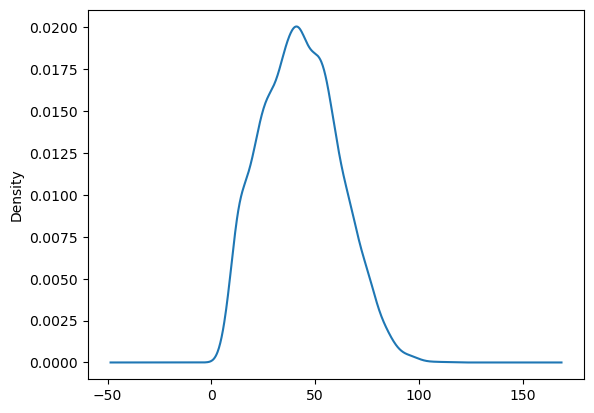

In [75]:
np.sqrt(y).plot(kind="density")

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
reg=LinearRegression()

In [78]:
regmodel=reg.fit(x,y)

In [79]:
regmodel.score(x,y)

0.5037361059653791

In [80]:
regmodel2=reg.fit(x,np.log(y))

In [81]:
regmodel2.score(x,np.log(y))

0.5719030911222629

In [82]:
regmodel3=reg.fit(x,np.sqrt(y))

In [83]:
regmodel3.score(x,np.sqrt(y))

0.5582643727379528

In [84]:
regtestpredict=regmodel.predict(bigmarttest_df)

In [85]:
regtestpredict

array([44.01422667, 31.62279229, 40.67303029, ..., 39.11203577,
       53.59463696, 32.53884437])

In [86]:
pd.DataFrame(regtestpredict).to_csv("reg.csv")